In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
import os
import random

====================================================================================================

**Goal : gather similar companies according to their features and number of trading days**

**Use : provide coherent and meaningful data to model**


**(_Ideal_ : develop tailored model to each type of groups)**

====================================================================================================

# Anaysis of Companies Age from `nasdaq_us_stats.xls`

In [2]:
#!!!Path might not be the same!!!

meta_df = pd.read_csv('../raw_data/metadata/nasdaq_us_stats.xls')

In [3]:
meta_df.head()

,Unnamed: 0,stock,days,min_close,max_close,start_date,end_date
0,0,AACG.US,3165,0.21703,3.850,2008-01-28,2021-01-25
1,1,AACQ.US,96,9.62000,11.070,2020-09-08,2021-01-25
2,2,AACQU.US,134,10.00000,11.900,2020-07-15,2021-01-25
3,3,AACQW.US,95,1.07500,2.580,2020-09-09,2021-01-25
4,4,AAL.US,1793,9.04000,56.989,2013-12-10,2021-01-25


In [4]:
meta_df.describe()

,Unnamed: 0,days,min_close,max_close
count,3921.000000,3921.000000,3921.000000,3.921000e+03
mean,1960.000000,1876.186942,8.257047,6.181576e+06
std,1132.039531,1795.084440,16.268917,3.863434e+08
min,0.000000,1.000000,0.001000,2.400000e-01
25%,980.000000,312.000000,1.490000,1.438700e+01
50%,1960.000000,1286.000000,5.010000,2.880000e+01
75%,2940.000000,3775.000000,10.384000,6.533000e+01
max,3920.000000,12879.000000,647.290000,2.419200e+10


In [5]:
meta_df = meta_df[['stock', 'days', 'min_close', 'max_close']]

## Company age classification

In [6]:
meta_df['range_price'] = meta_df['max_close'] - meta_df['min_close']
meta_df['years'] = meta_df['days']/365

In [7]:
clean_meta_df = meta_df[['stock', 'years', 'range_price']]

<AxesSubplot:xlabel='years', ylabel='Count'>

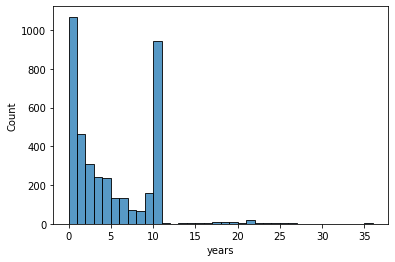

In [8]:
sns.histplot(clean_meta_df['years'], binwidth=1)

👆👆**Anomaly at less than 1 year and 10 year old companies**👆👆

In [9]:
bins = [0, 1, 5, 10, 15, 20, 25, 30, 40]

clean_meta_df['company_vintage'] = pd.cut(meta_df['years'].copy(), 
                                          bins)                            # A company aged of 1Y and one day is
                                          #labels=['(0, 1]','(1, 5]',       # part of the '(1, 5]' class
                                          #        '(5, 10]', '(10, 15]',
                                          #        '(15, 20]', '(20, 25]',
                                          #        '(25, 30]', '(30, 40]'])
print(clean_meta_df['company_vintage'])

0        (5, 10]
1         (0, 1]
2         (0, 1]
3         (0, 1]
4         (1, 5]
5        (5, 10]
6        (5, 10]
7       (10, 15]
8       (25, 30]
9       (10, 15]
10      (10, 15]
11      (10, 15]
12        (0, 1]
13        (0, 1]
14        (1, 5]
15      (10, 15]
16      (10, 15]
17        (0, 1]
18        (0, 1]
19        (1, 5]
20       (5, 10]
21        (0, 1]
22        (0, 1]
23        (0, 1]
24      (10, 15]
25        (0, 1]
26        (0, 1]
27        (0, 1]
28        (1, 5]
29        (0, 1]
          ...   
3891     (5, 10]
3892     (5, 10]
3893      (0, 1]
3894      (0, 1]
3895      (0, 1]
3896      (0, 1]
3897      (0, 1]
3898      (1, 5]
3899    (20, 25]
3900      (1, 5]
3901      (0, 1]
3902      (0, 1]
3903      (0, 1]
3904    (10, 15]
3905    (10, 15]
3906      (1, 5]
3907      (1, 5]
3908      (1, 5]
3909     (5, 10]
3910      (0, 1]
3911      (0, 1]
3912      (0, 1]
3913      (0, 1]
3914      (1, 5]
3915      (1, 5]
3916    (10, 15]
3917     (5, 10]
3918      (1, 

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
clean_meta_df['company_vintage'].apply(str)
print(clean_meta_df.info())
clean_meta_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 4 columns):
stock              3921 non-null object
years              3921 non-null float64
range_price        3921 non-null float64
company_vintage    3921 non-null category
dtypes: category(1), float64(2), object(1)
memory usage: 95.9+ KB
None


,stock,years,range_price,company_vintage
0,AACG.US,8.671233,3.63297,"(5, 10]"
1,AACQ.US,0.263014,1.45000,"(0, 1]"
2,AACQU.US,0.367123,1.90000,"(0, 1]"
3,AACQW.US,0.260274,1.50500,"(0, 1]"
4,AAL.US,4.912329,47.94900,"(1, 5]"


## Classification Results

<AxesSubplot:xlabel='years', ylabel='Count'>

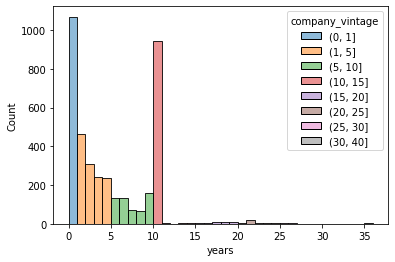

In [11]:
sns.histplot(data=clean_meta_df, x='years', binwidth=1, hue='company_vintage')
#plt.savefig('companies_age_classification.pdf', dpi=1200)

In [12]:
clean_meta_df.groupby('company_vintage')['stock'].count()

company_vintage
(0, 1]      1069
(1, 5]      1252
(5, 10]      564
(10, 15]     950
(15, 20]      32
(20, 25]      37
(25, 30]      13
(30, 40]       4
Name: stock, dtype: int64

### Saving List of Companies Name via `joblib`

In [13]:
stocks_bin_1 = []
stocks_bin_2 = []
stocks_bin_3 = []
stocks_bin_4 = []
stocks_bin_5 = []
stocks_bin_6 = []
stocks_bin_7 = []
stocks_bin_8 = []

for idx, row in clean_meta_df.iterrows():
    x = row['years']                                            # <=> ['days']/365
    st = row['stock'].replace('.US', '')
    
    #print(idx, x, row['stock'])
    if x <= 1 : stocks_bin_1.append(st)
    elif x > 1 and x <= 5: stocks_bin_2.append(st)
    elif x > 5 and x <= 10: stocks_bin_3.append(st)
    elif x > 10 and x <= 15: stocks_bin_4.append(st)        
    elif x > 15 and x <= 20: stocks_bin_5.append(st)        
    elif x > 20 and x <= 25: stocks_bin_6.append(st)        
    elif x > 25 and x <= 30: stocks_bin_7.append(st)        
    elif x > 30: stocks_bin_8.append(st)
    
print(f"Number of companies with less than a year of history: {len(stocks_bin_1)}")
print(f"Number of companies with between a year and 5 years of history: {len(stocks_bin_2)}")    
print(f"Number of companies with between 5 years and 10 years of history: {len(stocks_bin_3)}")
print(f"Number of companies with between 10 years and 15 years of history: {len(stocks_bin_4)}")
print(f"Number of companies with between 15 years and 20 years of history: {len(stocks_bin_5)}")
print(f"Number of companies with between 20 years and 25 years of history: {len(stocks_bin_6)}")
print(f"Number of companies with between 25 years and 30 years of history: {len(stocks_bin_7)}")
print(f"Number of companies with more than 30 years of history: {len(stocks_bin_8)}")

stock_bins = [stocks_bin_1, stocks_bin_2, stocks_bin_3,
              stocks_bin_4, stocks_bin_5, stocks_bin_6,
              stocks_bin_7, stocks_bin_8]

Number of companies with less than a year of history: 1069
Number of companies with between a year and 5 years of history: 1252
Number of companies with between 5 years and 10 years of history: 564
Number of companies with between 10 years and 15 years of history: 950
Number of companies with between 15 years and 20 years of history: 32
Number of companies with between 20 years and 25 years of history: 37
Number of companies with between 25 years and 30 years of history: 13
Number of companies with more than 30 years of history: 4


In [14]:
stock_bins

[['AACQ',
  'AACQU',
  'AACQW',
  'ABCL',
  'ABCM',
  'ABNB',
  'ABST',
  'ACAC',
  'ACACU',
  'ACACW',
  'ACAM',
  'ACAMU',
  'ACAMW',
  'ACCD',
  'ACEV',
  'ACEVU',
  'ACEVW',
  'ACKIU',
  'ACTC',
  'ACTCU',
  'ACTCW',
  'ADERU',
  'ADILW',
  'ADOC',
  'ADOCR',
  'ADOCU',
  'ADOCW',
  'ADTX',
  'ADV',
  'ADVWW',
  'ADXN',
  'AEACU',
  'AEPPZ',
  'AFBI',
  'AFIB',
  'AFINO',
  'AFRM',
  'AGBA',
  'AGBAR',
  'AGBAU',
  'AGBAW',
  'AGC',
  'AGCUU',
  'AGCWW',
  'AGNCO',
  'AGNCP',
  'AHAC',
  'AHACU',
  'AHACW',
  'AIH',
  'AIRTP',
  'AIRTW',
  'AKICU',
  'AKU',
  'AKUS',
  'ALAC',
  'ALACR',
  'ALACU',
  'ALGM',
  'ALGS',
  'ALRS',
  'ALTUU',
  'ALVR',
  'ALXO',
  'AMCIU',
  'AMCIW',
  'AMHC',
  'AMHCU',
  'AMHCW',
  'AMST',
  'AMTI',
  'AMYT',
  'ANDA',
  'ANDAR',
  'ANDAU',
  'ANDAW',
  'ANNX',
  'ANPC',
  'AOUT',
  'API',
  'APRE',
  'APXT',
  'APXTU',
  'APXTW',
  'ARBG',
  'ARBGU',
  'ARBGW',
  'ARKO',
  'ARKOW',
  'ARQT',
  'ARRY',
  'ARTLW',
  'ARYA',
  'ASLE',
  'ASLEW',
  'ASO

❗❗❗**You should check the path you want to save the `stock_bins` list**❗❗❗

(The `metadata` directory is where I saved the `nasdaq_us_stats.xls` csv file of Ian)

In [15]:
joblib.dump(stock_bins, '../raw_data/metadata/tickers_per_history_lenght__list')

['../raw_data/metadata/tickers_per_history_lenght__list']

In [16]:
stocks_tickers = joblib.load('../raw_data/metadata/tickers_per_history_lenght__list')
stocks_tickers

[['AACQ',
  'AACQU',
  'AACQW',
  'ABCL',
  'ABCM',
  'ABNB',
  'ABST',
  'ACAC',
  'ACACU',
  'ACACW',
  'ACAM',
  'ACAMU',
  'ACAMW',
  'ACCD',
  'ACEV',
  'ACEVU',
  'ACEVW',
  'ACKIU',
  'ACTC',
  'ACTCU',
  'ACTCW',
  'ADERU',
  'ADILW',
  'ADOC',
  'ADOCR',
  'ADOCU',
  'ADOCW',
  'ADTX',
  'ADV',
  'ADVWW',
  'ADXN',
  'AEACU',
  'AEPPZ',
  'AFBI',
  'AFIB',
  'AFINO',
  'AFRM',
  'AGBA',
  'AGBAR',
  'AGBAU',
  'AGBAW',
  'AGC',
  'AGCUU',
  'AGCWW',
  'AGNCO',
  'AGNCP',
  'AHAC',
  'AHACU',
  'AHACW',
  'AIH',
  'AIRTP',
  'AIRTW',
  'AKICU',
  'AKU',
  'AKUS',
  'ALAC',
  'ALACR',
  'ALACU',
  'ALGM',
  'ALGS',
  'ALRS',
  'ALTUU',
  'ALVR',
  'ALXO',
  'AMCIU',
  'AMCIW',
  'AMHC',
  'AMHCU',
  'AMHCW',
  'AMST',
  'AMTI',
  'AMYT',
  'ANDA',
  'ANDAR',
  'ANDAU',
  'ANDAW',
  'ANNX',
  'ANPC',
  'AOUT',
  'API',
  'APRE',
  'APXT',
  'APXTU',
  'APXTW',
  'ARBG',
  'ARBGU',
  'ARBGW',
  'ARKO',
  'ARKOW',
  'ARQT',
  'ARRY',
  'ARTLW',
  'ARYA',
  'ASLE',
  'ASLEW',
  'ASO

# Looking at Potential similarities in the Features of the Companies

## Functions definitions

In [17]:
from termcolor import colored

def precise_stocks_selector_local(tickers_list=[], path_files='../raw_data/processed/',
                                  random_sample=False, num_samp = 2, verbose=1):
    """
    Returns a concatened DataFrame of the stocks data which tickers' list were passed
    
    If random_sample = True, return a DataFrame with random sample of stocks from the tickers' list passed
    
    Example:
    INPUT: ['AEP', 'GT', 'INTC', 'PEP']
    OUTPUT: df.tickers.unique() ==> ['GT', 'INTC']
   
    """
    
    if verbose == 2:
        print(colored(tickers_list, 'yellow'))
        
    t = []
    for ticker in tickers_list:
        ticker = f"{ticker}.csv".lower()
        t.append(ticker)
    tickers_list = t
    
    if verbose == 2:
        print(colored(tickers_list, 'yellow'))
        print()
        print()
    
    if verbose >= 1:
        print(colored(f"****** Starting browsing the '{path_files}' directory ******", 'magenta'))
        
    filenames = []
    missing_stock_csv = []

    
    if random_sample:
        for file in os.listdir(path_files):
            if file.endswith('.csv'):
                if file in tickers_list:
                    filenames.append(file)
        
        for ticker in tickers_list:
            #print(ticker)
            #print(missing_stock_csv)
            if ticker not in filenames:
                missing_stock_csv.append(ticker)
                print(colored(f"{ticker} missing", 'red'))
            else:
                pass
        
        #print(missing_stock_csv)
        
        for missed in missing_stock_csv:
            if missed not in tickers_list:
                missing_stock_csv.remove(missed)
        #print(missing_stock_csv)
        
        if len(filenames) < num_samp:
            print(colored('\nSample size bigger that nuber of companies available\n','red'))
        else:
            sample = random.sample(filenames, num_samp)
            
        if verbose >= 1:
            print(colored("\n   *** Complete sampling ***", 'green'))
            
        if verbose == 2:
            print(colored(f"\nfilenames lenght: {len(filenames)}", "yellow"))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting stocks DataFrame creation the sample ******", 'magenta'))
        
        dfs = []

        for ticker in sample:
            ticker_df = pd.read_csv('../raw_data/processed/'+ticker)
            dfs.append(ticker_df)
            if verbose == 2:
                print(colored(f"{ticker} DataFrame created", 'yellow'))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting concatenating the sample ******", 'magenta'))
            
            
    else: 
        for file in os.listdir(path_files):
            if (file.endswith('.csv')):
                filenames.append(file)
                #print(f"{file}")
        
        if verbose >= 1:
            print(colored("\n   *** Complete file selection ***", 'green'))
        
        dfs = []
        
        if verbose == 2:
            print(colored(f"\nfilenames lenght: {len(filenames)}", "yellow"))
        
        if verbose >= 1:
            print(colored(f"****** Starting stocks DataFrame creation the sample ******", 'magenta'))
      
        for ticker in tickers_list:
            if ticker in filenames:
                #print(f"{ticker}")
                ticker_df = pd.read_csv('../raw_data/processed/'+ticker)
                dfs.append(ticker_df)
                if verbose == 2:
                    print(colored(f"{ticker} DataFrame created", 'yellow'))
            else:
                missing_stock_csv.append(ticker)
                print(colored(f"\n{ticker} missing", 'red'))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting concatenating the sample ******", 'magenta'))
    
    
    if len(missing_stock_csv) !=0:
        
        print(colored("""\n\n##### Problematic Issue: following stocks not in local database! #####""", "red"))
        print(colored(f"Number of missed stocks: {len(missing_stock_csv)}", "red"))
        print(colored(f"""\n{missing_stock_csv}""", "red"))
    
    return pd.concat(dfs)

## Exploring Companies per Vintage - The oldest ones

In [108]:
old_companies = stocks_tickers[-1]
old_companies

['AEP', 'GT', 'INTC', 'PEP']

In [109]:
old_df = precise_stocks_selector_local(tickers_list=old_companies, verbose=1)

****** Starting browsing the '../raw_data/processed/' directory ******

   *** Complete file selection ***
****** Starting stocks DataFrame creation the sample ******

gt.csv missing


****** Starting concatenating the sample ******


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['gt.csv']


In [110]:
stock_list = list(old_df.ticker.unique())
stock_list

['AEP', 'INTC', 'PEP']

### Separating the DataFrames by appending them to a list `dfs`

In [111]:
old_df.head()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return
0,AEP,1970-02-18,48.822370,61.204013,25.641026,-40370.981710,43797,0.032633,20.679157,22.455757,20.527434,-0.019653,0.002427,-0.022080,0.052433,0.093986,0.052433
1,AEP,1970-02-19,45.751097,46.153846,41.025641,-66331.981710,17836,0.031780,19.783309,23.032849,19.566425,-0.017977,0.003282,-0.021260,0.073658,0.078925,0.078925
2,AEP,1970-02-20,49.193068,61.204013,56.187291,-47478.981710,36689,0.031460,18.386579,21.596831,21.498109,-0.015383,0.004702,-0.020084,0.110003,0.067921,0.062708
3,AEP,1970-02-24,46.046768,46.153846,51.170569,-73582.981710,10585,0.031192,17.623847,23.489003,20.126938,-0.014251,0.004666,-0.018918,0.110526,0.073658,0.078925
4,AEP,1970-02-25,62.973359,94.996374,67.451411,-47841.530522,42056,0.035857,18.769133,32.719739,16.240707,-0.006055,0.010290,-0.016345,0.049653,0.004930,0.054154


In [112]:
dfs = []

for stock in stock_list:
    df = old_df[old_df['ticker']==stock]
    df = df.drop(columns=['ticker', 'date', '5TD_return', '10TD_return', '20TD_return'])
    dfs.append(df)    

In [113]:
dfs[0].head()

,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal
0,48.822370,61.204013,25.641026,-40370.981710,43797,0.032633,20.679157,22.455757,20.527434,-0.019653,0.002427,-0.022080
1,45.751097,46.153846,41.025641,-66331.981710,17836,0.031780,19.783309,23.032849,19.566425,-0.017977,0.003282,-0.021260
2,49.193068,61.204013,56.187291,-47478.981710,36689,0.031460,18.386579,21.596831,21.498109,-0.015383,0.004702,-0.020084
3,46.046768,46.153846,51.170569,-73582.981710,10585,0.031192,17.623847,23.489003,20.126938,-0.014251,0.004666,-0.018918
4,62.973359,94.996374,67.451411,-47841.530522,42056,0.035857,18.769133,32.719739,16.240707,-0.006055,0.010290,-0.016345


### Characterizing features of stocks with PCA 

df = np.array(scaler.fit_transform(dfs[0]))
stock_pca = pca.fit(dfs[0])
stock_pca = np.array(pca.transform(dfs[0]))
pd.DataFrame(stock_pca)

#print(stock_pca.shape)
pca_stocks_dict[f"{stock_list[idx]}"].append(stock_pca)

#### Gathering the `PCA` and `explained_variance_ratio`

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA()

pca_stocks_dict = dict.fromkeys(stock_list)
id_stocks_dict = dict.fromkeys(stock_list)

id_stocks_df = pd.DataFrame()

for idx, df in enumerate(dfs):
    df = scaler.fit_transform(df)
    stock_pca = pca.fit_transform(df)
    #print(stock_pca.shape)
    pca_stocks_dict[f"{stock_list[idx]}"] = pd.DataFrame(stock_pca, columns=list(dfs[0]))
    id_stocks_df[f"{stock_list[idx]} Explained Variance"] = pca.explained_variance_ratio_
    #id_stocks_dict[f"{stock_list[idx]}"] = pd.DataFrame(data=pca.explained_variance_ratio_,
    #                                                    columns=[f"{stock_list[idx]} Explained Variance"])

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [116]:
pca_stocks_dict["AEP"].head()

,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal
0,0.704710,-1.395126,-0.025896,-0.427799,0.145325,0.390084,0.295818,-0.083142,-0.714485,-0.555554,0.232602,1.820058e-14
1,0.713352,-1.392542,-0.048640,-0.518458,0.141620,0.493142,0.271985,-0.066459,0.064238,-0.384376,0.236296,-1.546517e-14
2,0.351074,-1.383137,0.266423,-0.685701,0.268222,-0.161742,0.378541,0.031167,0.029876,-0.208445,0.234954,-1.035423e-15
3,0.569584,-1.369444,0.062437,-0.701878,0.247080,0.364842,0.403467,-0.054593,0.313530,-0.272598,0.245166,9.533447e-16
4,-1.575296,-1.449260,0.966741,-0.277787,0.906085,0.287631,0.867119,-0.240445,-0.415212,-0.447068,0.276098,-2.400901e-15


In [117]:
id_stocks_dict["AEP"]

In [118]:
id_stocks_df

,AEP Explained Variance,INTC Explained Variance,PEP Explained Variance
0,4.006194e-01,3.581493e-01,4.004766e-01
1,2.239743e-01,1.826784e-01,2.225360e-01
2,1.295831e-01,1.265498e-01,1.241734e-01
3,8.822495e-02,9.845204e-02,9.038749e-02
4,5.913470e-02,6.266229e-02,5.602719e-02
5,3.358664e-02,5.783798e-02,3.585996e-02
6,3.217122e-02,3.722506e-02,3.002935e-02
7,1.877908e-02,3.401319e-02,2.356600e-02
8,7.626794e-03,2.697486e-02,8.543224e-03
9,4.688155e-03,8.870888e-03,4.355192e-03


#### Plotting the `explained_variance_ratio` of the vintage set

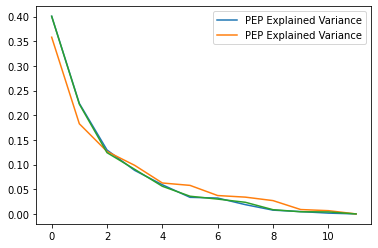

In [119]:
for stock in list(id_stocks_df):
    #sns.lineplot(id_stocks_df[stock]);
    plt.plot(id_stocks_df[stock]);
    plt.legend((f'{stock}',f'{stock}'));

## Exploring Companies per Vintage - (25, 30]

In [134]:
old_companies = stocks_tickers[-2]
old_companies

['AAPL',
 'ADI',
 'ADP',
 'AMAT',
 'AMD',
 'AMGN',
 'APA',
 'CSX',
 'EXC',
 'MAT',
 'NWL',
 'TXN',
 'WEN']

In [135]:
old_df = precise_stocks_selector_local(tickers_list=old_companies, verbose=1)

****** Starting browsing the '../raw_data/processed/' directory ******

   *** Complete file selection ***
****** Starting stocks DataFrame creation the sample ******

amat.csv missing

csx.csv missing

mat.csv missing


****** Starting concatenating the sample ******


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['amat.csv', 'csx.csv', 'mat.csv']


In [136]:
stock_list = list(old_df.ticker.unique())
stock_list

['AAPL', 'ADI', 'ADP', 'AMD', 'AMGN', 'APA', 'EXC', 'NWL', 'TXN', 'WEN']

### Separating the DataFrames by appending them to a list `dfs`

In [137]:
old_df.head()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return
0,AAPL,1984-10-24,57.978007,76.690103,69.424914,-5.139242e+09,387549732,0.003297,19.036526,35.250645,23.135370,-0.000432,0.001254,-0.001687,-0.052010,-0.018263,-0.119206
1,AAPL,1984-10-25,49.247645,56.625203,68.325221,-5.322591e+09,204200382,0.003326,18.051296,32.458308,29.224107,-0.000390,0.001037,-0.001427,-0.009378,-0.022156,-0.060181
2,AAPL,1984-10-26,44.483899,43.374797,58.896701,-5.425815e+09,71070262,0.003286,17.088681,30.521333,33.447714,-0.000548,0.000704,-0.001251,0.009726,-0.055397,-0.026218
3,AAPL,1984-10-29,45.183124,44.997296,48.332432,-5.484525e+09,129780480,0.003117,16.194824,29.881216,32.746222,-0.000641,0.000488,-0.001129,0.000000,-0.025925,-0.003162
4,AAPL,1984-10-30,48.093222,51.703624,46.691906,-5.570994e+09,216248865,0.003048,15.133939,31.950924,31.104445,-0.000608,0.000417,-0.001025,0.048060,-0.060959,0.035265


In [138]:
dfs = []

for stock in stock_list:
    df = old_df[old_df['ticker']==stock]
    df = df.drop(columns=['ticker', 'date', '5TD_return', '10TD_return', '20TD_return'])
    dfs.append(df)    

In [139]:
dfs[0].head()

,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal
0,57.978007,76.690103,69.424914,-5.139242e+09,387549732,0.003297,19.036526,35.250645,23.135370,-0.000432,0.001254,-0.001687
1,49.247645,56.625203,68.325221,-5.322591e+09,204200382,0.003326,18.051296,32.458308,29.224107,-0.000390,0.001037,-0.001427
2,44.483899,43.374797,58.896701,-5.425815e+09,71070262,0.003286,17.088681,30.521333,33.447714,-0.000548,0.000704,-0.001251
3,45.183124,44.997296,48.332432,-5.484525e+09,129780480,0.003117,16.194824,29.881216,32.746222,-0.000641,0.000488,-0.001129
4,48.093222,51.703624,46.691906,-5.570994e+09,216248865,0.003048,15.133939,31.950924,31.104445,-0.000608,0.000417,-0.001025


### Characterizing features of stocks with PCA 

df = np.array(scaler.fit_transform(dfs[0]))
stock_pca = pca.fit(dfs[0])
stock_pca = np.array(pca.transform(dfs[0]))
pd.DataFrame(stock_pca)

#print(stock_pca.shape)
pca_stocks_dict[f"{stock_list[idx]}"].append(stock_pca)

#### Gathering the `PCA` and `explained_variance_ratio`

In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA()

pca_stocks_dict = dict.fromkeys(stock_list)
id_stocks_dict = dict.fromkeys(stock_list)

id_stocks_df = pd.DataFrame()

for idx, df in enumerate(dfs):
    df = scaler.fit_transform(df)
    stock_pca = pca.fit_transform(df)
    #print(stock_pca.shape)
    pca_stocks_dict[f"{stock_list[idx]}"] = pd.DataFrame(stock_pca, columns=list(dfs[0]))
    id_stocks_df[f"{stock_list[idx]} Explained Variance"] = pca.explained_variance_ratio_
    #id_stocks_dict[f"{stock_list[idx]}"] = pd.DataFrame(data=pca.explained_variance_ratio_,
    #                                                    columns=[f"{stock_list[idx]} Explained Variance"])

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [141]:
#pca_stocks_dict["AEP"].head()

KeyError: 'AEP'

In [ ]:
#id_stocks_dict["AEP"]

In [ ]:
id_stocks_df

#### Plotting the `explained_variance_ratio` of the vintage set

In [ ]:
for stock in list(id_stocks_df):
    #sns.lineplot(id_stocks_df[stock]);
    plt.plot(id_stocks_df[stock]);
    plt.legend((f'{stock}',f'{stock}'));

## Exploring Companies per Vintage - (20, 25]

In [144]:
old_companies = stocks_tickers[-3]
old_companies

['ADBE',
 'ADSK',
 'ANIX',
 'ATRO',
 'BIIB',
 'CINF',
 'CMCSA',
 'COST',
 'CSCO',
 'CTAS',
 'EXPD',
 'FAST',
 'FISV',
 'FITB',
 'GNTX',
 'HAS',
 'HBAN',
 'KBAL',
 'KLAC',
 'LRCX',
 'MSFT',
 'MU',
 'MXIM',
 'NLOK',
 'NTRS',
 'ODP',
 'PAYX',
 'PCAR',
 'QCOM',
 'ROST',
 'SLM',
 'TER',
 'TROW',
 'WBA',
 'XLNX',
 'XRAY',
 'ZION']

In [145]:
old_df = precise_stocks_selector_local(tickers_list=old_companies, verbose=1)

****** Starting browsing the '../raw_data/processed/' directory ******

   *** Complete file selection ***
****** Starting stocks DataFrame creation the sample ******

anix.csv missing

cost.csv missing

ctas.csv missing

fast.csv missing

gntx.csv missing

has.csv missing

lrcx.csv missing

msft.csv missing

mu.csv missing

ntrs.csv missing

payx.csv missing

rost.csv missing

xlnx.csv missing


****** Starting concatenating the sample ******


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 13

['anix.csv', 'cost.csv', 'ctas.csv', 'fast.csv', 'gntx.csv', 'has.csv', 'lrcx.csv', 'msft.csv', 'mu.csv', 'ntrs.csv', 'payx.csv', 'rost.csv', 'xlnx.csv']


In [146]:
stock_list = list(old_df.ticker.unique())
stock_list

['ADBE',
 'ADSK',
 'ATRO',
 'BIIB',
 'CINF',
 'CMCSA',
 'CSCO',
 'EXPD',
 'FISV',
 'FITB',
 'HBAN',
 'KBAL',
 'KLAC',
 'MXIM',
 'NLOK',
 'ODP',
 'PCAR',
 'QCOM',
 'SLM',
 'TER',
 'TROW',
 'WBA',
 'XRAY',
 'ZION']

### Separating the DataFrames by appending them to a list `dfs`

In [147]:
old_df.head()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return
0,ADBE,1986-10-01,57.523855,50.000000,54.761905,-58035200.0,49049600,0.015385,31.226183,24.162357,16.293037,0.009684,-0.002270,0.011954,0.04,0.040000,0.400000
1,ADBE,1986-10-02,57.523855,25.000000,44.047619,-58483200.0,49497600,0.015714,30.385159,21.978650,14.820531,0.009007,-0.002358,0.011364,0.04,0.040000,0.360000
2,ADBE,1986-10-03,57.523855,0.000000,25.000000,-58572800.0,49587200,0.016020,29.604207,20.029236,13.506012,0.008374,-0.002393,0.010766,0.04,0.040000,0.320000
3,ADBE,1986-10-06,63.434871,33.333333,19.444444,-58828800.0,49843200,0.016305,28.879039,18.282881,12.328419,0.008580,-0.001749,0.010329,0.00,0.038462,0.269231
4,ADBE,1986-10-07,63.434871,33.333333,22.222222,-59225600.0,50240000,0.015854,28.205667,17.463017,11.775572,0.008644,-0.001348,0.009992,0.00,0.038462,0.230769


In [148]:
dfs = []

for stock in stock_list:
    df = old_df[old_df['ticker']==stock]
    df = df.drop(columns=['ticker', 'date', '5TD_return', '10TD_return', '20TD_return'])
    dfs.append(df)    

In [149]:
dfs[0].head()

,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal
0,57.523855,50.000000,54.761905,-58035200.0,49049600,0.015385,31.226183,24.162357,16.293037,0.009684,-0.002270,0.011954
1,57.523855,25.000000,44.047619,-58483200.0,49497600,0.015714,30.385159,21.978650,14.820531,0.009007,-0.002358,0.011364
2,57.523855,0.000000,25.000000,-58572800.0,49587200,0.016020,29.604207,20.029236,13.506012,0.008374,-0.002393,0.010766
3,63.434871,33.333333,19.444444,-58828800.0,49843200,0.016305,28.879039,18.282881,12.328419,0.008580,-0.001749,0.010329
4,63.434871,33.333333,22.222222,-59225600.0,50240000,0.015854,28.205667,17.463017,11.775572,0.008644,-0.001348,0.009992


### Characterizing features of stocks with PCA 

df = np.array(scaler.fit_transform(dfs[0]))
stock_pca = pca.fit(dfs[0])
stock_pca = np.array(pca.transform(dfs[0]))
pd.DataFrame(stock_pca)

#print(stock_pca.shape)
pca_stocks_dict[f"{stock_list[idx]}"].append(stock_pca)

#### Gathering the `PCA` and `explained_variance_ratio`

In [150]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA()

pca_stocks_dict = dict.fromkeys(stock_list)
id_stocks_dict = dict.fromkeys(stock_list)

id_stocks_df = pd.DataFrame()

for idx, df in enumerate(dfs):
    df = scaler.fit_transform(df)
    stock_pca = pca.fit_transform(df)
    #print(stock_pca.shape)
    pca_stocks_dict[f"{stock_list[idx]}"] = pd.DataFrame(stock_pca, columns=list(dfs[0]))
    id_stocks_df[f"{stock_list[idx]} Explained Variance"] = pca.explained_variance_ratio_
    #id_stocks_dict[f"{stock_list[idx]}"] = pd.DataFrame(data=pca.explained_variance_ratio_,
    #                                                    columns=[f"{stock_list[idx]} Explained Variance"])

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [151]:
#pca_stocks_dict["AEP"].head()

In [152]:
#id_stocks_dict["AEP"]

In [153]:
id_stocks_df

,ADBE Explained Variance,ADSK Explained Variance,ATRO Explained Variance,BIIB Explained Variance,CINF Explained Variance,CMCSA Explained Variance,CSCO Explained Variance,EXPD Explained Variance,FISV Explained Variance,FITB Explained Variance,...,NLOK Explained Variance,ODP Explained Variance,PCAR Explained Variance,QCOM Explained Variance,SLM Explained Variance,TER Explained Variance,TROW Explained Variance,WBA Explained Variance,XRAY Explained Variance,ZION Explained Variance
0,3.967471e-01,4.089742e-01,3.520424e-01,3.982663e-01,3.977872e-01,4.242981e-01,4.328603e-01,4.138215e-01,3.755423e-01,3.834362e-01,...,4.467224e-01,4.506434e-01,4.149320e-01,4.286617e-01,4.281534e-01,4.285613e-01,4.166093e-01,4.345716e-01,4.204985e-01,4.312874e-01
1,2.172641e-01,2.177947e-01,2.240085e-01,2.233003e-01,2.132585e-01,2.149700e-01,1.763965e-01,2.317488e-01,2.254898e-01,1.374642e-01,...,2.196524e-01,1.466430e-01,2.315174e-01,1.975143e-01,1.903556e-01,1.689240e-01,2.142350e-01,2.213730e-01,2.376503e-01,1.780540e-01
2,1.163434e-01,1.153014e-01,1.186777e-01,1.231792e-01,1.298821e-01,1.200133e-01,1.200468e-01,1.212323e-01,1.347982e-01,1.139043e-01,...,1.137267e-01,1.162944e-01,1.220862e-01,1.211774e-01,1.268106e-01,1.122726e-01,1.227227e-01,1.194891e-01,1.252453e-01,1.207568e-01
3,8.623521e-02,8.719154e-02,9.766209e-02,8.056447e-02,8.772952e-02,8.622412e-02,8.766845e-02,7.664508e-02,8.639015e-02,9.000826e-02,...,7.769378e-02,8.945788e-02,8.130834e-02,8.242476e-02,8.659055e-02,8.299287e-02,8.493177e-02,8.497118e-02,8.515455e-02,8.466067e-02
4,6.493466e-02,6.541248e-02,5.904108e-02,6.075310e-02,5.784532e-02,5.256461e-02,5.333200e-02,4.468965e-02,6.493188e-02,8.323295e-02,...,4.703440e-02,8.007640e-02,5.549851e-02,5.397236e-02,4.809812e-02,6.656889e-02,5.620808e-02,4.679979e-02,4.324063e-02,7.297222e-02
5,4.938399e-02,4.000065e-02,5.456082e-02,3.821553e-02,3.836130e-02,3.129090e-02,4.668764e-02,3.619470e-02,3.843653e-02,6.151065e-02,...,3.072928e-02,3.641670e-02,3.436890e-02,4.022073e-02,3.489618e-02,6.276760e-02,2.957062e-02,2.991580e-02,3.101682e-02,3.638614e-02
6,3.081194e-02,2.862842e-02,3.984846e-02,3.209422e-02,3.136971e-02,2.801584e-02,2.968101e-02,3.415648e-02,3.185761e-02,4.623830e-02,...,2.617962e-02,2.894446e-02,2.695014e-02,2.844589e-02,2.968987e-02,2.983164e-02,2.682201e-02,2.783735e-02,2.891687e-02,3.434284e-02
7,2.270841e-02,2.337127e-02,2.915737e-02,2.822487e-02,2.745981e-02,2.481366e-02,2.435292e-02,1.784099e-02,2.772245e-02,3.518661e-02,...,1.936040e-02,2.599329e-02,1.580634e-02,2.365081e-02,2.539731e-02,2.464476e-02,2.307091e-02,1.815402e-02,1.296775e-02,2.059660e-02
8,7.721417e-03,7.486311e-03,1.099985e-02,7.932867e-03,8.245322e-03,7.890749e-03,1.743170e-02,1.042448e-02,9.345581e-03,2.956608e-02,...,7.909022e-03,1.556536e-02,7.805159e-03,1.287083e-02,1.887378e-02,1.292852e-02,1.428610e-02,7.962275e-03,8.065039e-03,9.487635e-03
9,4.645698e-03,3.649120e-03,8.972942e-03,3.947656e-03,4.489573e-03,6.188377e-03,7.547141e-03,8.602574e-03,4.330789e-03,1.136291e-02,...,7.581876e-03,6.725806e-03,6.504235e-03,7.638435e-03,7.542706e-03,7.115612e-03,7.924080e-03,5.632617e-03,3.977462e-03,7.407853e-03


#### Plotting the `explained_variance_ratio` of the vintage set

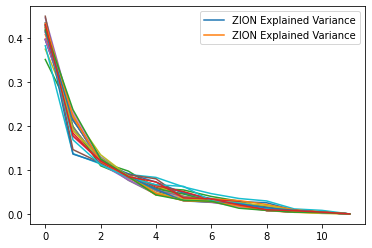

In [154]:
for stock in list(id_stocks_df):
    #sns.lineplot(id_stocks_df[stock]);
    plt.plot(id_stocks_df[stock]);
    plt.legend((f'{stock}',f'{stock}'));

## Exploring Companies per Vintage - (15, 20]

In [155]:
companies = stocks_tickers[-4]
companies

['ADMP',
 'AMZN',
 'AXGN',
 'BBBY',
 'CHKP',
 'CHRW',
 'CTXS',
 'DISH',
 'DLTR',
 'EBAY',
 'FLEX',
 'GILD',
 'HSIC',
 'IAC',
 'INTU',
 'LAMR',
 'MAR',
 'MCHP',
 'MITK',
 'NTAP',
 'NVDA',
 'PDCO',
 'PRDO',
 'PTEN',
 'RAVE',
 'RYAAY',
 'SANM',
 'SBUX',
 'SNPS',
 'TTNP',
 'VIAV',
 'VRSN']

In [156]:
companies_df = precise_stocks_selector_local(tickers_list=companies, verbose=1)

****** Starting browsing the '../raw_data/processed/' directory ******

   *** Complete file selection ***
****** Starting stocks DataFrame creation the sample ******

ctxs.csv missing

flex.csv missing

intu.csv missing

sbux.csv missing

snps.csv missing


****** Starting concatenating the sample ******


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 5

['ctxs.csv', 'flex.csv', 'intu.csv', 'sbux.csv', 'snps.csv']


In [157]:
stock_list = list(companies_df.ticker.unique())
stock_list

['ADMP',
 'AMZN',
 'AXGN',
 'BBBY',
 'CHKP',
 'CHRW',
 'DISH',
 'DLTR',
 'EBAY',
 'GILD',
 'HSIC',
 'IAC',
 'LAMR',
 'MAR',
 'MCHP',
 'MITK',
 'NTAP',
 'NVDA',
 'PDCO',
 'PRDO',
 'PTEN',
 'RAVE',
 'RYAAY',
 'SANM',
 'TTNP',
 'VIAV',
 'VRSN']

### Separating the DataFrames by appending them to a list `dfs`

In [158]:
companies_df.head()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return
0,ADMP,1995-09-29,39.278296,13.793103,9.195402e+00,-2328.909441,3865,63.250157,9.136276,15.840928,18.273836,-32.032222,-10.539257,-21.492965,0.024000,0.124000,0.174000
1,ADMP,1995-10-03,37.232995,0.000000,9.195402e+00,-2365.909441,3828,60.189431,9.444997,15.455462,20.262522,-35.002950,-10.807988,-24.194962,0.049180,0.178279,0.256148
2,ADMP,1995-10-05,37.232995,0.000000,4.597701e+00,-2365.909441,3852,55.890186,9.731667,15.455462,20.262522,-36.931550,-10.189271,-26.742280,0.024590,0.229508,0.202869
3,ADMP,1995-10-06,37.232995,0.000000,5.921189e-15,-2374.909441,3861,54.812316,9.181119,19.972402,19.179962,-38.021689,-9.023528,-28.998162,0.075820,0.217213,0.280738
4,ADMP,1995-10-09,37.232995,0.000000,5.921189e-15,-2384.909441,3871,52.354293,8.669895,19.413898,18.643617,-38.442491,-7.555464,-30.887028,0.178279,0.151639,0.229508


In [159]:
dfs = []

for stock in stock_list:
    df = companies_df[companies_df['ticker']==stock]
    df = df.drop(columns=['ticker', 'date', '5TD_return', '10TD_return', '20TD_return'])
    dfs.append(df)    

In [160]:
dfs[0].head()

,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal
0,39.278296,13.793103,9.195402e+00,-2328.909441,3865,63.250157,9.136276,15.840928,18.273836,-32.032222,-10.539257,-21.492965
1,37.232995,0.000000,9.195402e+00,-2365.909441,3828,60.189431,9.444997,15.455462,20.262522,-35.002950,-10.807988,-24.194962
2,37.232995,0.000000,4.597701e+00,-2365.909441,3852,55.890186,9.731667,15.455462,20.262522,-36.931550,-10.189271,-26.742280
3,37.232995,0.000000,5.921189e-15,-2374.909441,3861,54.812316,9.181119,19.972402,19.179962,-38.021689,-9.023528,-28.998162
4,37.232995,0.000000,5.921189e-15,-2384.909441,3871,52.354293,8.669895,19.413898,18.643617,-38.442491,-7.555464,-30.887028


### Characterizing features of stocks with PCA 

df = np.array(scaler.fit_transform(dfs[0]))
stock_pca = pca.fit(dfs[0])
stock_pca = np.array(pca.transform(dfs[0]))
pd.DataFrame(stock_pca)

#print(stock_pca.shape)
pca_stocks_dict[f"{stock_list[idx]}"].append(stock_pca)

In [161]:
tesdfd = pd.DataFrame(scaler.fit_transform(dfs[0]))
tesdfd

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.788839,-1.111153,-1.397298,-0.313692,-0.286209,1.150914,-1.373507,-0.575124,-0.328847,-0.936868,-0.998966,-0.661124
1,-0.960323,-1.586773,-1.397298,-0.313700,-0.286211,1.058022,-1.348303,-0.615001,-0.093505,-1.026780,-1.024409,-0.748677
2,-0.960323,-1.586773,-1.571789,-0.313700,-0.286210,0.927540,-1.324899,-0.615001,-0.093505,-1.085151,-0.965831,-0.831218
3,-0.960323,-1.586773,-1.746280,-0.313702,-0.286210,0.894827,-1.369846,-0.147718,-0.221616,-1.118145,-0.855462,-0.904315
4,-0.960323,-1.586773,-1.746280,-0.313704,-0.286209,0.820227,-1.411583,-0.205496,-0.285087,-1.130881,-0.716471,-0.965521
5,-0.313722,-0.468423,-1.335991,-0.313694,-0.286207,0.795179,-1.408443,-0.025745,-0.410422,-1.029093,-0.318680,-0.992690
6,-0.313722,-0.468423,-0.925701,-0.313688,-0.286205,0.771920,-1.405527,-0.151894,-0.530391,-0.937246,-0.025324,-0.994758
7,-0.564354,-1.027598,-0.720556,-0.313684,-0.286206,0.750323,-1.402820,-0.272431,-0.645023,-0.903486,0.063996,-0.989185
8,0.067553,0.471050,-0.375891,-0.313675,-0.286204,0.778177,-1.315474,0.174194,-0.808364,-0.763757,0.400641,-0.954807
9,0.993033,1.861471,0.478878,-0.313658,-0.286200,0.899861,-1.120294,0.986862,-1.043274,-0.439985,1.130529,-0.857977


#### Gathering the `PCA` and `explained_variance_ratio`

In [162]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA()

pca_stocks_dict = dict.fromkeys(stock_list)
id_stocks_dict = dict.fromkeys(stock_list)

id_stocks_df = pd.DataFrame()

for idx, df in enumerate(dfs):
    df = scaler.fit_transform(df)
    stock_pca = pca.fit_transform(df)
    #print(stock_pca.shape)
    pca_stocks_dict[f"{stock_list[idx]}"] = pd.DataFrame(stock_pca, columns=list(dfs[0]))
    id_stocks_df[f"{stock_list[idx]} Explained Variance"] = pca.explained_variance_ratio_
    #id_stocks_dict[f"{stock_list[idx]}"] = pd.DataFrame(data=pca.explained_variance_ratio_,
    #                                                    columns=[f"{stock_list[idx]} Explained Variance"])

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [163]:
#pca_stocks_dict["AAPL"].head()

In [164]:
#id_stocks_dict["AAPL"]

In [165]:
id_stocks_df

,ADMP Explained Variance,AMZN Explained Variance,AXGN Explained Variance,BBBY Explained Variance,CHKP Explained Variance,CHRW Explained Variance,DISH Explained Variance,DLTR Explained Variance,EBAY Explained Variance,GILD Explained Variance,...,NVDA Explained Variance,PDCO Explained Variance,PRDO Explained Variance,PTEN Explained Variance,RAVE Explained Variance,RYAAY Explained Variance,SANM Explained Variance,TTNP Explained Variance,VIAV Explained Variance,VRSN Explained Variance
0,3.476057e-01,4.046198e-01,3.384031e-01,4.590639e-01,4.276857e-01,4.415697e-01,4.369189e-01,4.259513e-01,4.611764e-01,4.029830e-01,...,4.099116e-01,4.349341e-01,4.309370e-01,4.640288e-01,3.556350e-01,4.358331e-01,4.251299e-01,3.443481e-01,3.640949e-01,4.153146e-01
1,1.694750e-01,2.210315e-01,1.877775e-01,2.160579e-01,1.868825e-01,2.229679e-01,1.824041e-01,2.174023e-01,1.816398e-01,2.279415e-01,...,2.105404e-01,2.058927e-01,1.864993e-01,1.924928e-01,1.493339e-01,1.557301e-01,1.344013e-01,1.714245e-01,1.483018e-01,1.559607e-01
2,1.223164e-01,1.161361e-01,1.289895e-01,1.146746e-01,1.162790e-01,1.242941e-01,1.185823e-01,1.152727e-01,1.233647e-01,1.234297e-01,...,9.863315e-02,1.217640e-01,1.201327e-01,1.160108e-01,1.230523e-01,1.208732e-01,1.177323e-01,1.280788e-01,1.377446e-01,1.254368e-01
3,8.968923e-02,8.648349e-02,1.012999e-01,8.206326e-02,8.551900e-02,7.450817e-02,8.243555e-02,8.776007e-02,7.778075e-02,8.268253e-02,...,8.383747e-02,8.098276e-02,8.344084e-02,7.965614e-02,8.995859e-02,8.515455e-02,9.659526e-02,9.932730e-02,8.840845e-02,8.691365e-02
4,7.481402e-02,6.396926e-02,6.519468e-02,3.253990e-02,5.463082e-02,3.522946e-02,6.332994e-02,5.427591e-02,6.621653e-02,5.765600e-02,...,7.097449e-02,3.694912e-02,5.912312e-02,5.480429e-02,7.405060e-02,6.647090e-02,7.456364e-02,8.558825e-02,8.055851e-02,8.091706e-02
5,6.865966e-02,4.486419e-02,5.693575e-02,2.726821e-02,4.145527e-02,3.322537e-02,4.159296e-02,3.132468e-02,3.476972e-02,3.628228e-02,...,4.842156e-02,3.248319e-02,4.641297e-02,2.952539e-02,6.662464e-02,4.561245e-02,5.567543e-02,7.150113e-02,7.385285e-02,6.581944e-02
6,5.344335e-02,2.885005e-02,5.250982e-02,2.413836e-02,3.405278e-02,2.893444e-02,3.192262e-02,3.103844e-02,2.128665e-02,3.029159e-02,...,2.808940e-02,3.069145e-02,3.261587e-02,2.744108e-02,5.314380e-02,3.440456e-02,3.151028e-02,4.931295e-02,4.133559e-02,3.329811e-02
7,5.029459e-02,1.879879e-02,2.971278e-02,1.936150e-02,2.632394e-02,2.611334e-02,2.774769e-02,1.919032e-02,2.064339e-02,2.401922e-02,...,2.069133e-02,2.706384e-02,2.414863e-02,2.145328e-02,4.367419e-02,2.566020e-02,2.943142e-02,2.926035e-02,2.752491e-02,2.199991e-02
8,9.192061e-03,7.342277e-03,1.990464e-02,1.465656e-02,1.579547e-02,7.904436e-03,7.358892e-03,7.879658e-03,7.177492e-03,8.437641e-03,...,1.918718e-02,1.795672e-02,6.690314e-03,7.318610e-03,2.696288e-02,2.035884e-02,2.455343e-02,7.822394e-03,2.593284e-02,7.263616e-03
9,7.855152e-03,5.048399e-03,1.134094e-02,7.491647e-03,7.881270e-03,3.581323e-03,4.324175e-03,6.455154e-03,3.474397e-03,3.719845e-03,...,6.867721e-03,7.775421e-03,6.225035e-03,3.826384e-03,1.080873e-02,6.764033e-03,7.335325e-03,7.265590e-03,7.810293e-03,3.659474e-03


#### Plotting the `explained_variance_ratio` of the vintage set

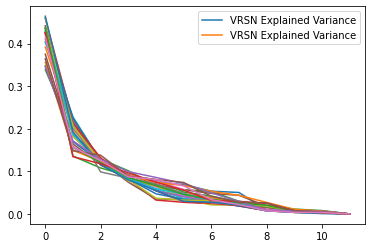

In [166]:
for stock in list(id_stocks_df):
    #sns.lineplot(id_stocks_df[stock]);
    plt.plot(id_stocks_df[stock]);
    plt.legend((f'{stock}',f'{stock}'));

## To be done..